In [22]:
import pandas as pd

In [23]:
data = []
template_dict = {
    "input size":0,
    "proc number":0,
    "duration (ns)":0,
    "throughput (gb/s)":0
}

with open("./stats.txt", 'r') as f:
    for line in f.readlines():
        if (line.find(":")) == -1:
            continue
        key, val = line.split(":")
        key = key.strip()
        if (key == "input size"):
            data.append({})
        val = float(val.strip())
        # print(key, val)
        data[-1][key] = val
# print(data)
df = pd.DataFrame(data)
print(df)

      input size   proc number  duration (ns)  throughput (gb/s)
0           10.0  1.000000e+00        26632.0           0.002798
1           50.0  1.000000e+00        70582.0           0.005278
2          100.0  1.187391e+09       245281.0           0.003038
3          200.0  1.000000e+00       956863.0           0.001557
4          500.0  1.000000e+00      5849499.0           0.000637
...          ...           ...            ...                ...
2525      8000.0  1.280000e+02     28408328.0           0.002098
2526     10000.0  1.280000e+02     38307404.0           0.001945
2527     20000.0  1.280000e+02    122588588.0           0.001216
2528     25000.0  1.280000e+02    178602750.0           0.001043
2529     50000.0  1.280000e+02    627838451.0           0.000593

[2530 rows x 4 columns]


In [24]:
import matplotlib.pyplot as plt

In [25]:
def draw(df, draw_proc_num,input_size_min=0 , intput_size_max=50000, y_axis="duration (ns)"):
    draw_df = df.loc[lambda x: x['input size'] <= intput_size_max].loc[ lambda x: x['input size'] >= input_size_min]
    fig, ax = plt.subplots()
    # print(df.loc[lambda x: x['input size'] <= input_size_max])
    for key, grp in draw_df.groupby(['proc number']):
        # print(key)
        # print(grp)
        
        if (key in draw_proc_num):
            label = "proc number: " + str(int(key))
            ax = grp.plot(ax=ax, kind='line', x="input size", y=y_axis, label=label)
    plt.legend(loc='best')
    ax.set_ylabel(y_axis)
    plt.show()

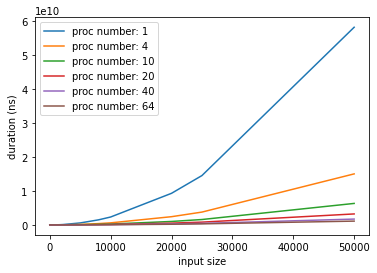

In [26]:
proc_range = [1,4, 10, 20, 40, 64]
draw(df,proc_range)

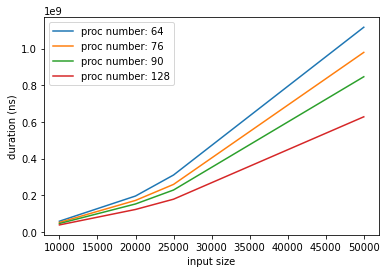

In [27]:
proc_range = [ 64, 76, 90, 128]
draw(df, proc_range, input_size_min=10000)

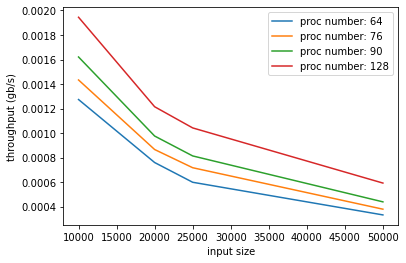

In [28]:
proc_range = [ 64, 76, 90, 128]
draw(df, proc_range, input_size_min=10000, y_axis="throughput (gb/s)")

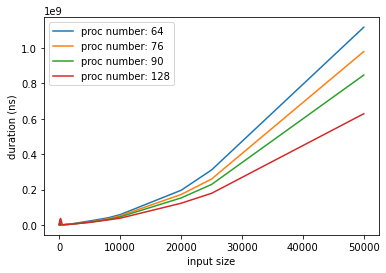

In [29]:
proc_range = [64, 76, 90, 128]
draw(df,proc_range)

In [30]:
merge_data = []
with open("./stats_odd_even_merge.txt", 'r') as f:
    for line in f.readlines():
        if (line.find(":")) == -1:
            continue
        key, val = line.split(":")
        key = key.strip()
        if (key == "input size"):
            merge_data.append({})
        val = float(val.strip())
        # print(key, val)
        merge_data[-1][key] = val
# print(data)
merge_df = pd.DataFrame(merge_data)
print(merge_df)

      input size  proc number  duration (ns)  throughput (gb/s)
0           10.0          4.0   1.896730e+05           0.000393
1           50.0          4.0   5.250100e+04           0.007096
2          100.0          4.0   6.559300e+04           0.011359
3          200.0          4.0   1.132770e+05           0.013155
4          500.0          4.0   2.685940e+05           0.013870
...          ...          ...            ...                ...
1979      8000.0          1.0   1.486586e+09           0.000040
1980     10000.0          1.0   2.323453e+09           0.000032
1981     20000.0          1.0   9.286906e+09           0.000016
1982     25000.0          1.0   1.450792e+10           0.000013
1983     50000.0          1.0   5.810027e+10           0.000006

[1984 rows x 4 columns]


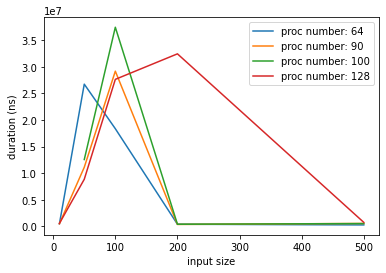

In [31]:
proc_range = [64, 90, 100, 128]
draw(merge_df.sort_values(by="input size"), proc_range, intput_size_max= 500)

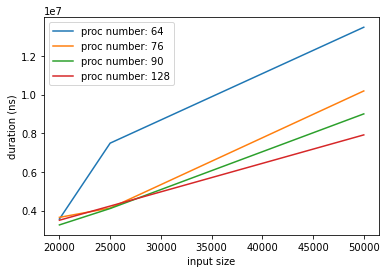

In [32]:
proc_range = [64, 76, 90, 128]
draw(merge_df,proc_range, input_size_min=20000)

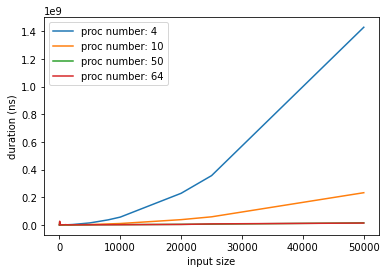

In [33]:
proc_range = [4, 10, 50, 64]
draw(merge_df, proc_range)

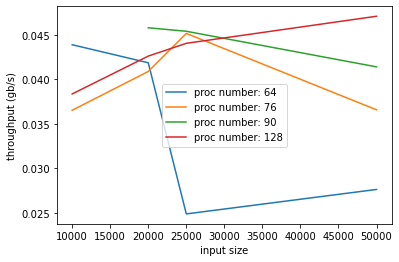

In [34]:
proc_range = [ 64, 76, 90, 128]
draw(merge_df, proc_range, input_size_min=10000, y_axis="throughput (gb/s)")

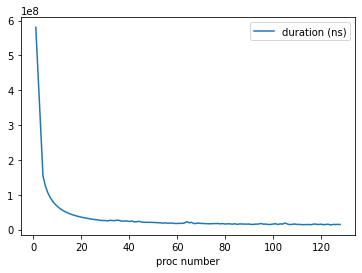

In [35]:
# def draw(df, draw_proc_num,input_size_min=0 , intput_size_max=50000, y_axis="duration (ns)"):
#     draw_df = df.loc[lambda x: x['input size'] <= intput_size_max].loc[ lambda x: x['input size'] >= input_size_min]
#     fig, ax = plt.subplots()
#     # print(df.loc[lambda x: x['input size'] <= input_size_max])
#     for key, grp in draw_df.groupby(['input size']):
#         # print(key)
#         # print(grp)
#         if (key in draw_proc_num):
#             label = "proc number: " + str(int(key))
#             ax = grp.plot(ax=ax, kind='line', x="input size", y=y_axis, label=label)
#     plt.legend(loc='best')
#     ax.set_ylabel(y_axis)
#     plt.show()
draw_df = df.loc[lambda x: x['input size'] == 5000].loc[lambda x: x['proc number']>0 ].loc[lambda x: x['proc number']<129]
draw_df = draw_df.sort_values(by="proc number")
draw_df.plot(x="proc number", y='duration (ns)')
# grp = df.groupby("input size")
# for key, group in grp:
#     print(key, group)
    # label = 'input size' +str(int(key))
    # grp.plot(kind='line', x="proc number", y="duration (ns)", label=label)

In [36]:
def speed_up(df, input_size, proc_min = 0, proc_max = 128):
    filtered_df = df.loc[lambda x: x['input size'] == input_size]
    serial =  filtered_df.loc[lambda x: x['proc number'] == 1]['duration (ns)']
    ts =serial.values[0]
    filtered_df = filtered_df.loc[lambda x: x['proc number'] > proc_min].loc[lambda x: x['proc number']<=proc_max]
    
    # print(ts)
    filtered_df['speedup'] = filtered_df['duration (ns)'].map(lambda x: ts/x)
    filtered_df['serial fraction'] = (filtered_df["proc number"]/filtered_df['speedup'] - 1)/(filtered_df["proc number"]-1)
    filtered_df['parallel fraction'] = 1-filtered_df['serial fraction']
    filtered_df['speedup efficiency'] = filtered_df['speedup']/filtered_df['proc number']
    filtered_df = filtered_df.sort_values(by="proc number")

    

    filtered_df.plot(x='proc number', y='speedup', kind="line")

    # filtered_df.sort_values(by='parallel fraction')
    filtered_df.plot(x='proc number', y="speedup efficiency", kind="line")
    # return filtered_df

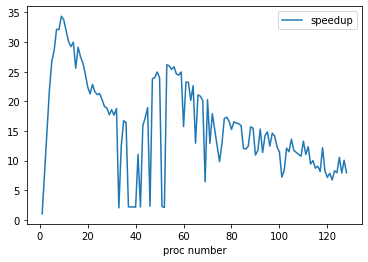

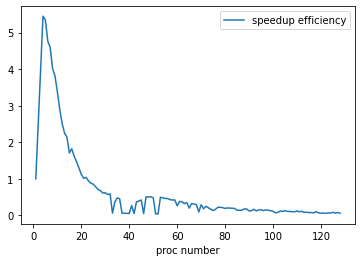

In [47]:
speed_up(merge_df, 500)


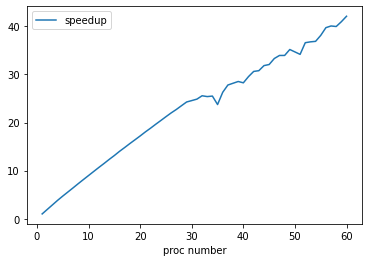

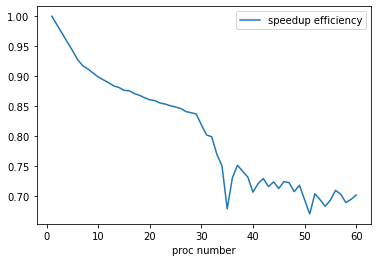

In [43]:
speed_up(df, 10000, proc_min=0, proc_max=60)